# Webscrapping 

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import datetime
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick
import os
import matplotlib.ticker as ticker

In [ ]:
url = "https://s3platform.jrc.ec.europa.eu/digital-innovation-hubs-tool"
url = "https://s3platform-legacy.jrc.ec.europa.eu/web/guest/digital-innovation-hubs-tool"
 
# Getting the webpage, creating a Response object.
response = requests.get(url)

# Extracting the source code of the page.
data = response.text
 
# Passing the source code to BeautifulSoup to create a BeautifulSoup object for it.
soup = BeautifulSoup(data, 'lxml')
 
# Extracting all the <a> tags into a list.
tags = soup.find_all('a')
 
# Extracting URLs from the attribute href in the <a> tags.
for tag in tags:
   print(tag.get('href'))

In [ ]:
urls_list = [tag.get('href') for tag in tags]
urls_set = set(urls_list); urls_list
urls_set = [str(url) for url in urls_set];

In [5]:
# r = re.compile(".dih.\d+.view")
# r = re.compile("platfrom")
# newlist = list(filter(r.match, urls_set)) # Read Note
# print(newlist)

#urls_set

In [30]:
# Checking if we have a right class for getting address for apartments
dihs = soup.findAll('td', {'class': 'table-cell first table-sortable-column'}); dihs

[<td class="table-cell first table-sortable-column">
 <a href="https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/3480/view" target="_blank">Aachen DIH Center for Robotics in Healthcare</a>
 </td>,
 <td class="table-cell first table-sortable-column">
 <a href="https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/1063/view" target="_blank">Aalen University / Transfer Platform Industry 4.0</a>
 </td>,
 <td class="table-cell first table-sortable-column">
 <a href="https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/13281/view" target="_blank">Aarhus University Centre for Digitalisation, Big Data and Data Analytics (DIGIT)</a>
 </td>,
 <td class="table-cell first table-sortable-column">
 <a href="https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/1417/view" target="_blank">Accelerating Photonics innovation for SME’s (ACTPHAST 4.0)</a>
 </td>,
 <td class="table-cell first table-sortable-

In [31]:
# We need to define how to find the next page on ads site
#next_page = soup.find('span', {'class': 'pager lfr-pagination-buttons'}).a.get('href')
# <ul class="pager lfr-pagination-buttons">
# <li class="disabled first">
#next_page = soup.find('span', {'class': 'last'})
#next_page = soup.find(text='Next')
next_page = soup.find('ul', {'class': 'pager lfr-pagination-buttons'})
#.get_text(strip=True)
#.a.get('href')
#print(next_page)
links = []
# for a in next_page.findAll('a', href=True):
#     links.append(a['href'])
    
[links.append(a['href']) for a in next_page.findAll('a', href=True)]
next_page = links[2]
next_page

'https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool?p_p_id=digitalinnovationhub_WAR_digitalinnovationhubportlet&p_p_lifecycle=0&p_p_state=normal&p_p_mode=view&p_p_col_id=column-1&p_p_col_count=1&_digitalinnovationhub_WAR_digitalinnovationhubportlet_cur=2&_digitalinnovationhub_WAR_digitalinnovationhubportlet_orderByCol=Hub Name&_digitalinnovationhub_WAR_digitalinnovationhubportlet_orderByType=asc'

In [ ]:
# # define a function which will fetch us a links to the dihs
# def get_dihs(soup):
#     return [dih.get('href') for dih in soup.findAll('td', {'class': 'table-cell first table-sortable-column'})]

In [32]:
# for a in soup.find('td', {'class': 'table-cell first table-sortable-column'}).findAll("a", href=True):
#     print(a['href']) # działa!!!!
    
# for tag in soup.find_all('td', {'class': 'table-cell first table-sortable-column'}):
#     print(tag.findAll('a', href=True))

# tags = [tag.findAll('a', href=True) for tag in soup.find_all('td', {'class': 'table-cell first table-sortable-column'})]

# for a in tags:
#     print(a[0].get('href'))
    
def get_dihs(soup):
    tags = [tag.findAll('a', href=True) for tag in soup.find_all('td', {'class': 'table-cell first table-sortable-column'})]
    return [a[0].get('href') for a in tags]

# for dih in dihs2:
#     dih.findChildren("a" , recursive=False)

In [33]:
get_dihs(soup)

['https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/3480/view',
 'https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/1063/view',
 'https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/13281/view',
 'https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/1417/view',
 'https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/1248/view',
 'https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/13293/view',
 'https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/1349/view',
 'https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/5722/view',
 'https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/1427/view',
 'https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/18451/view']

In [35]:
# Limit of pages we want to explore
limit = 68
# Starting link
url = "https://s3platform.jrc.ec.europa.eu/digital-innovation-hubs-tool?p_p_id=digitalinnovationhub_WAR_digitalinnovationhubportlet&p_p_lifecycle=0&p_p_state=normal&p_p_mode=view&p_p_col_id=column-1&p_p_col_count=1&_digitalinnovationhub_WAR_digitalinnovationhubportlet_cur=1&_digitalinnovationhub_WAR_digitalinnovationhubportlet_orderByCol=Hub%20Name&_digitalinnovationhub_WAR_digitalinnovationhubportlet_orderByType=asc&formDate=1619507829766&freeSearch=&evolStages=1&evolStages=3&evolStages=5&h2020=false"
url = "https://s3platform-legacy.jrc.ec.europa.eu/web/guest/digital-innovation-hubs-tool"
dihs_urls = set() # set is important in order not to have the same apartment twice
for i in range(limit):
    try:
        # Getting the webpage, creating a Response object.
        response = requests.get(url)
        data = response.text
        soup = BeautifulSoup(data, 'lxml')

        new_dihs = get_dihs(soup)
        print(f"Discovered {len(new_dihs)} DIHs")
        dihs_urls = dihs_urls.union(new_dihs)

        next_page = soup.find('ul', {'class': 'pager lfr-pagination-buttons'})
        links = []
        [links.append(a['href']) for a in next_page.findAll('a', href=True)]
        url = links[2]
    except:
        continue

len(dihs_urls)

Discovered 10 DIHs
Discovered 10 DIHs
Discovered 10 DIHs
Discovered 10 DIHs
Discovered 10 DIHs
Discovered 10 DIHs
Discovered 10 DIHs
Discovered 10 DIHs
Discovered 10 DIHs
Discovered 10 DIHs
Discovered 10 DIHs
Discovered 10 DIHs
Discovered 10 DIHs
Discovered 10 DIHs
Discovered 10 DIHs
Discovered 10 DIHs
Discovered 10 DIHs
Discovered 10 DIHs
Discovered 10 DIHs
Discovered 10 DIHs
Discovered 10 DIHs
Discovered 10 DIHs
Discovered 10 DIHs
Discovered 10 DIHs
Discovered 10 DIHs
Discovered 10 DIHs
Discovered 10 DIHs
Discovered 10 DIHs
Discovered 10 DIHs
Discovered 10 DIHs
Discovered 10 DIHs
Discovered 10 DIHs
Discovered 10 DIHs
Discovered 10 DIHs
Discovered 10 DIHs
Discovered 10 DIHs
Discovered 10 DIHs
Discovered 10 DIHs
Discovered 10 DIHs
Discovered 10 DIHs
Discovered 10 DIHs
Discovered 10 DIHs
Discovered 10 DIHs
Discovered 10 DIHs
Discovered 10 DIHs
Discovered 10 DIHs
Discovered 10 DIHs
Discovered 10 DIHs
Discovered 10 DIHs
Discovered 10 DIHs
Discovered 10 DIHs
Discovered 10 DIHs
Discovered 1

678

#### Here comes a section of trial and error where we learn how to extract data from a given page

In [ ]:
# Let's check out how we can extract data from a single ad

#url = 'https://www.olx.pl/oferta/bezposrednia-sprzedaz-mieszkanie-w-dzielnicy-wola-CID3-IDDQ9z8.html#c58c991a6e'
url = 'https://s3platform.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/21694/view'
response = requests.get(url)
data = response.text
bs = BeautifulSoup(data, 'lxml')
bs

In [ ]:
# title
#bs.find_all('table', {'class': 'item'})[0].th.get_text()
bs.find_all('h2', {'class': 'hubTitle pull-left'})[0].get_text()
bs.find_all(['div'], {'class': 'text-right'})[0].get_text(strip=True)
#bs.find_all(re.compile("(small)"))

In [ ]:
bs.find_all('div', {'class': 'hubCardContent'})[4].get_text()


In [ ]:
# descriptions in each card

# hubCardContent
#print(bs.find_all('div', {'class': 'hubCardContent'})[2].get_text())
#bs.find_all('p', {'class': 'infoLabel'})
#bs.find_all('ul')
#[0].get_text()

descriptions = [content.get_text() for content in bs.find_all('div', {'class': 'hubCardContent'})]

In [ ]:
# for h4 in bs.find_all('h4'):
#     print(h4.get_text())

clean_categories = ['Contact Data',
 'Description',
 'Link to national or regional initiatives for digitising industry',
 'Market and Services',
 'Service Examples',
 'Organization',
 'Evolutionary Stage',
 'Geographical Scope',
 'Funding',
 'Partners',
 'Technologies']
dirty_categories = [h4.get_text() for h4 in bs.find_all('h4')]
categories = []
for a in dirty_categories:
    if a in clean_categories:
        categories.append(a)
categories

In [ ]:
for cat, desc in zip(categories, descriptions):
    print(cat,'\n\n\n', desc)

In [ ]:
# right side of the table
#bs.find_all('table', {'class': 'item'})[0].strong.get_text(strip=True)

In [ ]:
info = dict(zip(categories, descriptions))
info['Name'] = bs.find_all('h2', {'class': 'hubTitle pull-left'})[0].get_text(strip=True)

#### Here comes the final loop which adds elements to the dataframe

In [36]:
# Creating an empty dataframe

# Select which variables we gonna need
clean_categories = ['Contact Data',
 'Description',
 'Link to national or regional initiatives for digitising industry',
 'Market and Services',
 'Service Examples',
 'Organization',
 'Evolutionary Stage',
 'Geographical Scope',
 'Funding',
 'Partners',
 'Technologies', 'Customers', 'H2020 Projects']

df = pd.DataFrame(columns=clean_categories + ['Name']); df
# for key in info.keys():
#     df.loc[0, key] = info[key]

,Contact Data,Description,Link to national or regional initiatives for digitising industry,Market and Services,Service Examples,Organization,Evolutionary Stage,Geographical Scope,Funding,Partners,Technologies,Customers,H2020 Projects,Name


In [37]:
# limit = 677
# i = 0

# for url in dihs_urls:
#     if 'dih' in url:
#         # Data processing
#         print(url, i)
#         response = requests.get(url)
#         data = response.text
#         bs = BeautifulSoup(data, 'lxml')
        
#         # Extracting
#         descriptions = [content.get_text() for content in bs.find_all('div', {'class': 'hubCardContent'})]
#         dirty_categories = [h4.get_text() for h4 in bs.find_all('h4')]
#         categories = []
#         for a in dirty_categories:
#             if a in clean_categories:
#                 categories.append(a)
#         info = dict(zip(categories, descriptions))
#         info['Name'] = bs.find_all('h2', {'class': 'hubTitle pull-left'})[0].get_text(strip=True)
        
        
#         # Adding to the dataframe
#         for key in info.keys():
#             df.loc[i, key] = info[key]
#         df.loc[i,'Link'] = url
    
#         i += 1
#         if i == limit:
#             break

# df

In [39]:
# def get_dih_df(limit=678):
#     i = 0
#     for url in dihs_urls:
#         try:
#             # Data processing
#             print(url, i)
#             response = requests.get(url)
#             data = response.text
#             bs = BeautifulSoup(data, 'lxml')

#             # Extracting
#             descriptions = [content.get_text() for content in bs.find_all('div', {'class': 'hubCardContent'})]
#             dirty_categories = [h4.get_text() for h4 in bs.find_all('h4')]
#             categories = []
#             for a in dirty_categories:
#                 if a in clean_categories:
#                     categories.append(a)
#             info = dict(zip(categories, descriptions))
#             info['Name'] = bs.find_all('h2', {'class': 'hubTitle pull-left'})[0].get_text(strip=True)
#             info['Last Updated'] = bs.find_all(['div'], {'class': 'text-right'})[0].get_text(strip=True)


#             # Adding to the dataframe
#             for key in info.keys():
#                 df.loc[i, key] = info[key]
#             df.loc[i,'Link'] = url
#         except:
#             pass
#         i += 1
#         if i == limit:
#             break
#     return df

In [40]:
def get_dih_df(limit=678):
    for i, url in enumerate(list(dihs_urls)):
        try:
            # Data processing
            print(url, i)
            response = requests.get(url)
            data = response.text
            bs = BeautifulSoup(data, 'lxml')

            # Extracting
            descriptions = [content.get_text() for content in bs.find_all('div', {'class': 'hubCardContent'})]
            dirty_categories = [h4.get_text() for h4 in bs.find_all('h4')]
            categories = []
            for a in dirty_categories:
                if a in clean_categories:
                    categories.append(a)
            info = dict(zip(categories, descriptions))
            info['Name'] = bs.find_all('h2', {'class': 'hubTitle pull-left'})[0].get_text(strip=True)
            info['Last Updated'] = bs.find_all(['div'], {'class': 'text-right'})[0].get_text(strip=True)


            # Adding to the dataframe
            for key in info.keys():
                df.loc[i, key] = info[key]
            df.loc[i,'Link'] = url
        except:
            pass
        if i == limit:
            break
    return df

In [41]:
df3 = get_dih_df()
df3.head()

https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/16873/view 0
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/18459/view 1
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/5684/view 2
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/13300/view 3
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/19899/view 4
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/17865/view 5
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/13689/view 6
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/1222/view 7
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/1392/view 8
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/1102/view 9
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/3100/view 10
htt

https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/1109/view 90
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/12660/view 91
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/1170/view 92
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/19411/view 93
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/18268/view 94
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/1098/view 95
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/18457/view 96
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/13308/view 97
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/1500/view 98
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/1322/view 99
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/1282/vi

https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/12531/view 179
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/1364/view 180
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/3365/view 181
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/1016/view 182
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/1776/view 183
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/12495/view 184
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/1039/view 185
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/1453/view 186
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/6070/view 187
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/2872/view 188
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/

https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/1119/view 268
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/18480/view 269
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/2367/view 270
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/1416/view 271
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/18454/view 272
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/1363/view 273
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/1516/view 274
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/18421/view 275
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/5633/view 276
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/1472/view 277
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih

https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/1003/view 357
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/18486/view 358
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/13267/view 359
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/1450/view 360
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/2167/view 361
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/1422/view 362
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/3485/view 363
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/13270/view 364
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/2767/view 365
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/1092/view 366
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih

https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/16670/view 446
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/1433/view 447
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/3085/view 448
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/18466/view 449
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/13331/view 450
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/17268/view 451
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/1027/view 452
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/16775/view 453
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/20402/view 454
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/1088/view 455
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/

https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/1080/view 535
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/1351/view 536
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/12552/view 537
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/1430/view 538
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/19205/view 539
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/1233/view 540
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/5392/view 541
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/18420/view 542
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/13265/view 543
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/1063/view 544
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/di

https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/18490/view 624
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/1383/view 625
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/1025/view 626
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/1180/view 627
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/1069/view 628
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/19212/view 629
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/2174/view 630
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/1099/view 631
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/1465/view 632
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih/18400/view 633
https://s3platform-legacy.jrc.ec.europa.eu/digital-innovation-hubs-tool/-/dih

,Contact Data,Description,Link to national or regional initiatives for digitising industry,Market and Services,Service Examples,Organization,Evolutionary Stage,Geographical Scope,Funding,Partners,Technologies,Customers,H2020 Projects,Name,Last Updated,Link
0,"\nCoordinator (Networked, cluster organization...",\nDescription\nSmart Health DIH is non-profit ...,"\nNationally, Smart Energy DIH activities are ...",\nSectors\n\nLife sciences & healthcare\n\nTRL...,\n\nNational Open Access Scientific Data Archi...,"\nOrganizational form\nNetworked organization,...",\nFully operational\n,\nNational\n,\n\nHorizon 2020\nEuropean Social Fund\nNation...,\n\nSantaros klinikos\nPartner Type\nLarge ent...,\n\nArtificial intelligence\n\n,\nNumber of customers annually\n>50\nType of c...,NaN,Smart Health Digital Innovation HubIšmaniosios...,Last updated: 05/10/20 07:28,https://s3platform-legacy.jrc.ec.europa.eu/dig...
1,\nCoordinator \nINSTITUT FÜR ANGEWANDTE SYSTEM...,\nDescription\n\n,\n-\n,NaN,NaN,\nOrganizational form\n-\nTurnover\n-\nNumber ...,\nPotential DIHs from H2020\n,NaN,NaN,NaN,NaN,NaN,\n\n\nSmartAgriHubs \nConnecting the dots to u...,INSTITUT FÜR ANGEWANDTE SYSTEMTECHNIK BREMEN GMBH,Last updated: 31/03/20 13:52,https://s3platform-legacy.jrc.ec.europa.eu/dig...
2,\nCoordinator (Industry association)\nConfindu...,\nDescription\nDIH Sicilia is a no profit enti...,\nDIH Sicilia is member of the newtwork of DIH...,\nSectors\n\nAgriculture and food\nMaritime an...,NaN,\nOrganizational form\n(Part of) Private organ...,\nIn preparation\n,\nRegional\n,\n\nPrivate funding\n\n,\n\nSTMicroelectronics\nPartner Type\nLarge en...,\n\nMicro/nano electronics\nSensory systems\nC...,NaN,NaN,DIH SiciliaDIH Sicilia,Last updated: 20/12/18 14:56,https://s3platform-legacy.jrc.ec.europa.eu/dig...
3,"\nCoordinator (Networked, cluster organization...","\nDescription\nWith 380 members, Mov’eo is a n...",\nMov’eo is fully implicated in digitising pro...,\nSectors\n\nTransport and logistics\nManufact...,\n\n3-\tNetworking activities.\nClient profile...,\nOrganizational form\nPublic Private Partners...,\nFully operational\n,\nInternational\n,\n\nHorizon 2020\nCOSME\nEuropean Regional Dev...,\n\nCEA\nPartner Type\nResearch & Technology o...,\n\nOrganic and large area electronics\nMicro/...,\nNumber of customers annually\n>50\nType of c...,NaN,Mov'eoMov'eo,Last updated: 02/05/19 09:15,https://s3platform-legacy.jrc.ec.europa.eu/dig...
4,\nCoordinator (University)\nReutlingen Univers...,\nDescription\nWerk150 was founded in 2011 and...,\n\n5G Transfer Center for Small and Medium-Si...,\nSectors\n\nTransport and logistics\nEducatio...,\n\nDevelopment of IT-Service for Manufacturin...,\nOrganizational form\n(part of) Public organi...,\nFully operational\n,\nGlobal\n,\n\nNational specific innovation funding\nRegi...,\n\nFraunhofer-Institut für Produktionstechnik...,\n\nCyber physical systems\nRobotics\nInternet...,\nNumber of customers annually\n11-25\nType of...,NaN,Reutlingen University Werk150Hochschule Reutli...,Last updated: 11/01/21 21:41,https://s3platform-legacy.jrc.ec.europa.eu/dig...


In [42]:
technologies = [str(dih).split('\n') for dih in df3['Technologies'].str.extract(r'\n\n([\S\s]+)')[0]]
set([tech for dih in technologies for tech in dih])

df3[df3['Technologies'].str.contains('Serbian chamber of commerce', na=False)]
df3['Name'].value_counts()

Innovalia ZDM Digital Innovation HubHub Cero Defectos Innovalia                    1
MediaTech Hub Potsdam                                                              1
Sustainability factoryDuurzaamheidsfabriek                                         1
LTU AI Innovation HubLTU AI Innovation Hub                                         1
Santaka Artificial Intelligence DIHSantakos slėnis                                 1
                                                                                  ..
Smart Connected Supplier NetworkSmart Connected Supplier Network                   1
OFICINAOFICINA                                                                     1
FUNDACION PARA LAS TECNOLOGIAS AUXILIARES DE LA AGRICULTURA                        1
Move2Digital                                                                       1
RISE ICT Research Institute of Sweden ICTResearch Institute of Sweden, RISE ICT    1
Name: Name, Length: 677, dtype: int64

In [43]:
df = df3.copy()

# Data Cleaning

In [44]:
# CONTACT DATA COLUMN

# Year established
df['Year Established'] = df['Contact Data'].str.extract(r'(Year Established\n)(\d{4})')[1]
df['Year Established'] = df['Year Established']

In [45]:
# Country
df['Country'] = df['Contact Data'].str.extract(r'(?:Location\n)(.+)\((.+)\)')[1]

In [46]:
# DESCRIPTION

df['Description'] = df['Description'].apply(lambda x: x.replace('\nDescription\n', ''))

In [47]:
# MARKET AND SERVICES

#Markets 
markets = df['Market and Services'].str.extract(r'(\nSectors\n\n)([\S\s]+)(\n\nTRL Focus)')[1].apply(lambda x: str(x).split('\n'))

markets_clear = []

for dih in markets:
    for sector in dih:
        if sector not in markets_clear:
            markets_clear.append(sector)
markets_clear.remove('nan')

#TRL Focus
trls = df['Market and Services'].str.extract(r'(TRL Focus\n\n)([\S\s]+)(\n\nServices provided)')[1].apply(lambda x: str(x).split('\n'))

trls_clear = []

for dih in trls:
    for trl in dih:
        if trl not in trls_clear:
            trls_clear.append(trl)
trls_clear

trls_clear = ['TRL'+ str(i) for i in range(1,10)]

# Services

services = df['Market and Services'].str.extract(r'(Services provided\n\n)([\S\s]+)')[1].apply(lambda x: str(x).split('\n'))

services_clear = []

for dih in services:
    for service in dih:
        if service not in services_clear:
            services_clear.append(service)
            
services_clear.remove('nan')
services_clear.remove('')

In [48]:
markets_clear.sort()
services_clear.sort()
print(markets_clear)
print(services_clear)

['Aeronautics and Space', 'Agriculture and food', 'Community, social and personal service activities', 'Construction', 'Consumer goods/products', 'Culture and Creative industries', 'Education', 'Energy and utilities', 'Financial services', 'Life sciences & healthcare', 'Manufacture of basic metals and fabricated metal products', 'Manufacture of chemicals, chemical products and man-made fibres', 'Manufacture of coke, refined petroleum products and nuclear fuel', 'Manufacture of electrical and optical equipment', 'Manufacture of food products, beverages and tobacco', 'Manufacture of leather and leather products', 'Manufacture of machinery and equipment', 'Manufacture of other non-metallic mineral products', 'Manufacture of pulp, paper and paper products; publishing and printing', 'Manufacture of rubber and plastic products', 'Manufacture of textiles and textile products', 'Manufacture of transport equipment', 'Manufacture of wood and wood products', 'Maritime and fishery', 'Mining and qu

In [49]:
for market in markets_clear:
    df[market] = df['Market and Services'].apply(lambda x: market in str(x))
    
for trl in trls_clear:
    df[trl] = df['Market and Services'].apply(lambda x: trl in str(x))

for service in services_clear:
    df[service] = df['Market and Services'].apply(lambda x: service in str(x))

In [50]:
# ORGANIZATION
df['Organizational Form'] = df['Organization'].str.extract(r'(?:Organizational form\n)(.+)')[0]
df['Turnover'] = df['Organization'].str.extract(r'(?:Turnover\n)(.+)')[0]
df['No of Employees'] = df['Organization'].str.extract(r'(?:Number of employees\n)(.+)')[0]

In [51]:
# EVOLUTIONARY STAGE
df['Evolutionary Stage'] = df['Evolutionary Stage'].apply(lambda x: str(x).replace('\n', ''))

In [52]:
# GEOGRAPHICAL SCOPE
df['Geographical Scope'] = df['Geographical Scope'].apply(lambda x: str(x).replace('\n', '').replace('nan', ''))
#df['Geographical Scope'] = df['Geographical Scope'].fillna('')

In [53]:
# FUNDING
df['Funding'] = df['Funding'].apply(lambda x: str(x).replace('\n', ', ').replace(', , ', '').replace('nan', ''))

In [54]:
# # PARTNERS
# for i in range(len(df)):
#     df.loc[i, 'Partners Institutions'] = ''.join(list(df['Partners'].str.extractall(r'(\n\n)(.+)(\n)')[1][i].values))
    
# df

In [55]:
# ', '.join(list(df['Partners'].str.extractall(r'(\n\n)(.+)(\n)')[1][669].values))

In [56]:
# CUSTOMERS 
df['Number of Customers Annually'] = df['Customers'].str.extract(r'(Number of customers annually\n)(.+)')[1].fillna('')

In [57]:
df['Type of Customers'] = df['Customers'].str.extract(r'(Type of customers\n\n)([\s\S]+)')[1].str.replace('\n', ', ').fillna('')

In [58]:
# TECHNOLOGIES
technologies = [str(dih).split('\n') for dih in df['Technologies'].str.extract(r'\n\n([\S\s]+)')[0]]

#[tech for tech in technologies for dih in technologies]
# [item for sublist in technologies for item in sublist]
# for dih in technologies:
#     for tech in dih:
#         tech
set([tech for dih in technologies for tech in dih])
technologies_clear = [
 'Additive manufacturing',
 'Advanced, or high performance computing',
 'Artificial intelligence',
 'Big data, data analytics, data handling',
 'Cloud computing',
 'Communication networks',
 'Cyber physical systems',
 'Cyber security',
 'Distributed ledger technology',
 'Gamification',
 'Industrial biotechnology',
 'Interaction technologies',
 'Internet of things',
 'Internet services',
 'Laser based manufacturing',
 'Logistics',
 'Micro/nano electronics',
 'Mobility & Location based technologies',
 'Nanotechnology',
 'Networked, cluster organization',
 'New media technologies',
 'Organic and large area electronics',
 'Photonics and imaging technologies ',
 'Polyhedra',
 'Quantum Computing ',
 'Research & Technology organization',
 'Robotics',
 'Screens and display technologies',
 'Sensory systems',
 'Simulation, modelling and digital twins',
 'Software as a service and service architectures',
 'Virtual, augmented and extended reality']

In [59]:
for tech in technologies_clear:
    df[tech] = df['Technologies'].apply(lambda x: tech in str(x))

In [60]:
# PARTNERS
df['Number of Partners'] = df['Partners'].str.count('\n\n')

In [61]:
# LAST UPDATED
# Last updated: 14/04/20 10:05
df['Last Updated'] = pd.to_datetime(df['Last Updated'].str.extract(r'(?:Last updated: )(.+)')[0])

In [1]:
columns_order = ['Name',
       'Country', 'Last Updated', 'Description', 'Link to national or regional initiatives for digitising industry',
       'Year Established','Evolutionary Stage', 'Geographical Scope', 'Organizational Form', 'Turnover',
       'No of Employees', 
                 'Funding', 'Partners', 'Number of Partners', 'Number of Customers Annually', 'Type of Customers', 'H2020 Projects', 'Link', 
                 'Aeronautics and Space', 'Agriculture and food', 'Community, social and personal service activities', 
                 'Construction', 'Consumer goods/products', 'Culture and Creative industries', 'Education', 'Energy and utilities', 
                 'Financial services', 'Life sciences & healthcare', 'Manufacture of basic metals and fabricated metal products', 
                 'Manufacture of chemicals, chemical products and man-made fibres', 
                 'Manufacture of coke, refined petroleum products and nuclear fuel', 'Manufacture of electrical and optical equipment', 
                 'Manufacture of food products, beverages and tobacco', 'Manufacture of leather and leather products', 
                 'Manufacture of machinery and equipment', 'Manufacture of other non-metallic mineral products', 
                 'Manufacture of pulp, paper and paper products; publishing and printing', 'Manufacture of rubber and plastic products', 
                 'Manufacture of textiles and textile products', 'Manufacture of transport equipment', 'Manufacture of wood and wood products', 
                 'Maritime and fishery', 'Mining and quarrying', 'Mobility (incl. Automotive)', 'Other Manufacturing', 
                 'Professional, Scientific and Technical Activities', 'Public administration', 'Real estate, renting and business activities', 
                 'Telecommunications, Information and Communication', 'Tourism (incl. restaurants and hospitality)', 'Transport and logistics', 
                 'Wholesale and retail', # here TRL starts
                 'TRL1', 'TRL2',
       'TRL3', 'TRL4', 'TRL5', 'TRL6', 'TRL7', 'TRL8', 'TRL9', # here services starts
'Access to Funding and Investor Readiness Services', 'Awareness creation', 'Collaborative Researchs', 
'Commercial infrastructure', 'Concept validation and prototyping', 'Digital Maturity Assessment', 
'Ecosystem building, scouting, brokerage, networking', 'Education and skills development', 'Incubator/accelerator support', 
'Market intelligence', 'Mentoring', 'Other', 'Pre-competitive series production', 'Testing and validation', 
'Visioning and Strategy Development for Businesses', 'Voice of the customer, product consortia',
        # here technologies start
        'Additive manufacturing',
       'Advanced, or high performance computing', 'Artificial intelligence',
       'Big data, data analytics, data handling', 'Cloud computing',
       'Communication networks', 'Cyber physical systems', 'Cyber security',
       'Distributed ledger technology', 'Gamification',
       'Industrial biotechnology', 'Interaction technologies',
       'Internet of things', 'Internet services', 'Laser based manufacturing',
       'Logistics', 'Micro/nano electronics',
       'Mobility & Location based technologies', 'Nanotechnology',
       'Networked, cluster organization', 'New media technologies',
       'Organic and large area electronics',
       'Photonics and imaging technologies ', 'Polyhedra',
       'Quantum Computing ', 'Research & Technology organization', 'Robotics',
       'Screens and display technologies', 'Sensory systems',
       'Simulation, modelling and digital twins',
       'Software as a service and service architectures',
       'Virtual, augmented and extended reality', 
                 'Contact Data',
       'Market and Services', 'Service Examples', 'Organization',
       'Technologies']

In [88]:
df2 = df[columns_order]
df2 = df2.loc[:,~df2.columns.duplicated()]

In [89]:
EEA = ['Croatia', 'France', 'Belgium', 'Spain', 'Latvia', 'Italy',
       'Netherlands', 'Germany', 'Portugal', 'Ireland',
       'Poland', 'Romania', 'Sweden', 'Lithuania', 'Greece', 'Norway',
       'United Kingdom', 'Switzerland', 'Austria',
    'Finland', 'Bulgaria', 'Luxembourg',
        'Denmark', 'Hungary',
       'Czech Republic', 'Slovenia', 'Estonia',
       'Cyprus', 'Slovakia', 'Malta']
df2['EEA'] = df2['Country'].apply(lambda x: x in EEA)

In [90]:
# sectors, trl, services, technologies
df2['Number Sectors'] = df2[markets_clear].sum(axis=1)
df2['Number TRLs'] = df2[trls_clear].sum(axis=1)
df2['Number Services'] = df2[services_clear].sum(axis=1)
df2['Number Technologies'] = df2[technologies_clear].sum(axis=1)

df2['Share Sectors'] = df2['Number Sectors']*100/len(markets_clear)
df2['Share TRLs'] = df2['Number TRLs']*100/len(trls_clear)
df2['Share Services'] = df2['Number Services']*100/len(services_clear)
df2['Share Technologies'] = df2['Number Technologies']*100/len(technologies_clear)

In [91]:
df2.to_excel('DIH Mapping Raw Data.xlsx', sheet_name='raw data', index_label=False, encoding='utf-8')

# Data analysis

In [284]:
#FILTERS
DATE = '2019-01-01'
STAGE = 'Fully operational'
EEA_YES = True

# Point of focus
# technologies
# services
# TRL
# sectors

In [285]:
df = df2[(df2['Last Updated']>DATE) & (df2['Evolutionary Stage']==STAGE) & (df2['EEA']==EEA_YES)]

## 1. Basic analysis

In [256]:
sns.set_theme(style="whitegrid")
PATH = r'C:\Users\bartd\OneDrive\Pulpit\World Bank\PfoR\digitals\DIH\Analysis\Charts'

## 2. General population analysis

In [287]:
technologies_sum = df[technologies_clear].sum(axis=0)
technologies_share = df[technologies_clear].sum(axis=0).sort_values()*100/len(df)

services_sum = df[services_clear].sum(axis=0).sort_values()
services_share = df[services_clear].sum(axis=0).sort_values()*100/len(df)

trls_sum = df[trls_clear].sum(axis=0)
trls_share = df[trls_clear].sum(axis=0)*100/len(df)

markets_sum = df[markets_clear].sum(axis=0)
markets_share = df[markets_clear].sum(axis=0).sort_values()*100/len(df)

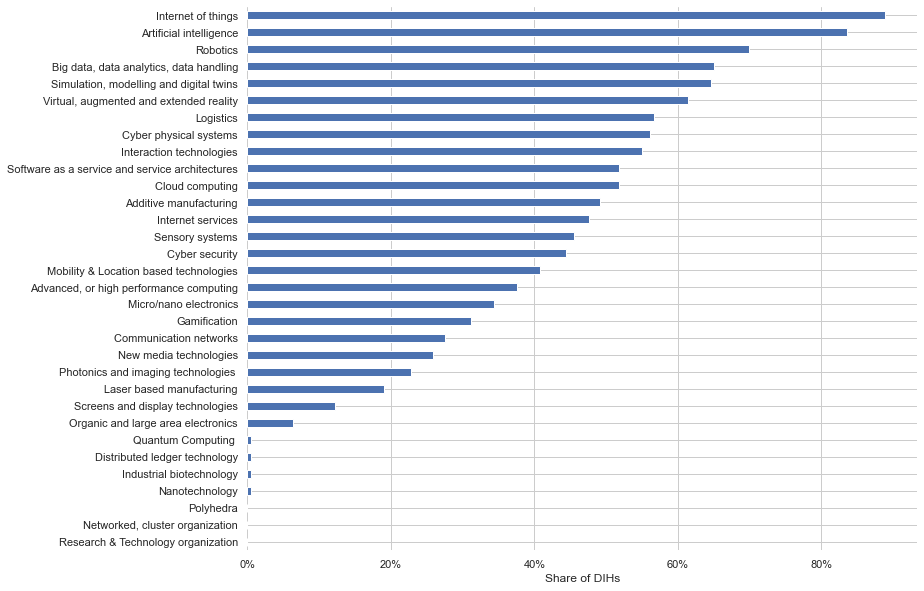

In [288]:
fig, ax = plt.subplots(figsize=(12,10))
ax = technologies_share.plot.barh()
ax.grid(True)
ax.set_xlabel('Share of DIHs')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_frame_on(False)
fig.savefig(os.path.join(PATH,'technologies_share.jpg'), bbox_inches='tight')

In [289]:
# sns.set_color_codes("pastel")
# fig, ax = plt.subplots(figsize=(12,10))
# sns.barplot(y=services_share.index, x=services_share.values, color='b')

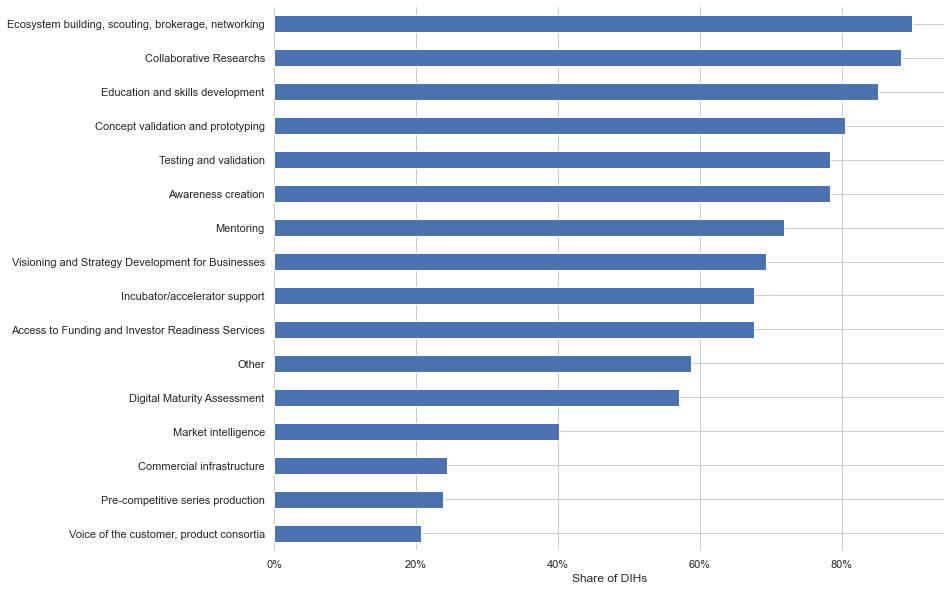

In [290]:
fig, ax = plt.subplots(figsize=(12,10))
ax = services_share.plot.barh()
ax.grid(True)
ax.set_xlabel('Share of DIHs')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_frame_on(False)
fig.savefig(os.path.join(PATH,'services_share.jpg'), bbox_inches='tight')

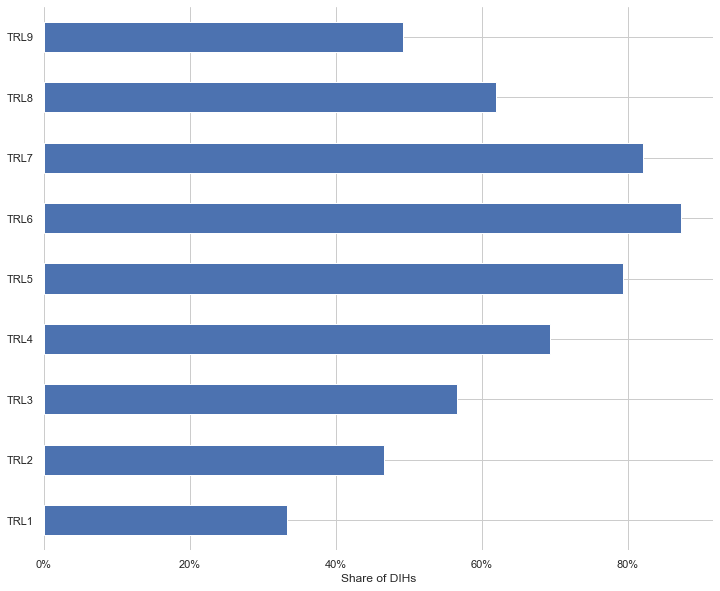

In [261]:
fig, ax = plt.subplots(figsize=(12,10))
ax = trls_share.plot.barh()
ax.grid(True)
ax.set_xlabel('Share of DIHs')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_frame_on(False)
fig.savefig(os.path.join(PATH,'trls_share.jpg'), bbox_inches='tight')

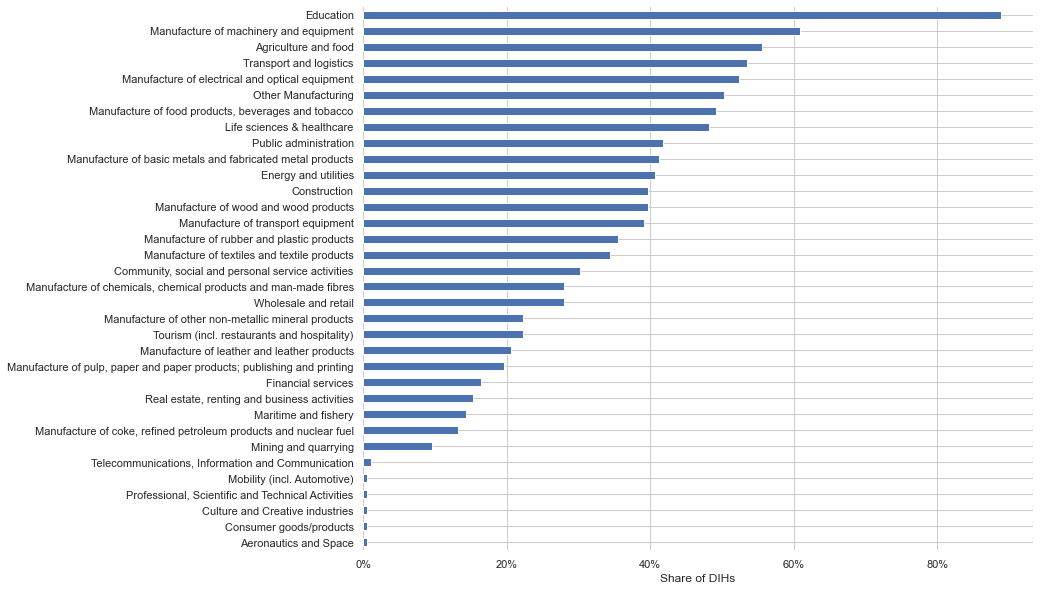

In [291]:
fig, ax = plt.subplots(figsize=(12,10))
ax = markets_share.plot.barh()
ax.set_xlabel('Share of DIHs')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_frame_on(False)
fig.savefig(os.path.join(PATH,'markets_share.jpg'), bbox_inches='tight')

## 3. Country coverage

In [263]:
countries = df['Country'].unique()
no_countries = len(df['Country'].unique())
print(f'There are in total {no_countries} in the dataset and their names are:')
print(df['Country'].unique())

There are in total 25 in the dataset and their names are:
['Croatia' 'Spain' 'Italy' 'Portugal' 'Ireland' 'Romania' 'Lithuania'
 'Finland' 'Sweden' 'Hungary' 'Czech Republic' 'Slovenia' 'Netherlands'
 'France' 'Greece' 'United Kingdom' 'Germany' 'Switzerland' 'Norway'
 'Austria' 'Belgium' 'Denmark' 'Cyprus' 'Slovakia' 'Latvia']


In [292]:
# a = df.groupby('Country')['Construction'].sum()
# b = df.groupby('Country')['Education'].sum()
# print(a)
# print(b)
# pd.concat([a,b],axis=1)
technologies_country = pd.DataFrame(index=countries)
for tech in technologies_clear:
    a = df.groupby('Country')[tech].sum()
    technologies_country = pd.concat([technologies_country,a],axis=1)

technologies_country_share = pd.Series(index=technologies_clear)
for tech in technologies_clear:
    technologies_country_share[tech] = (technologies_country[tech] > 0).sum()/no_countries
technologies_country_share = technologies_country_share.sort_values()*100

<ipython-input-292-18ec4c758c76>:11: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  technologies_country_share = pd.Series(index=technologies_clear)


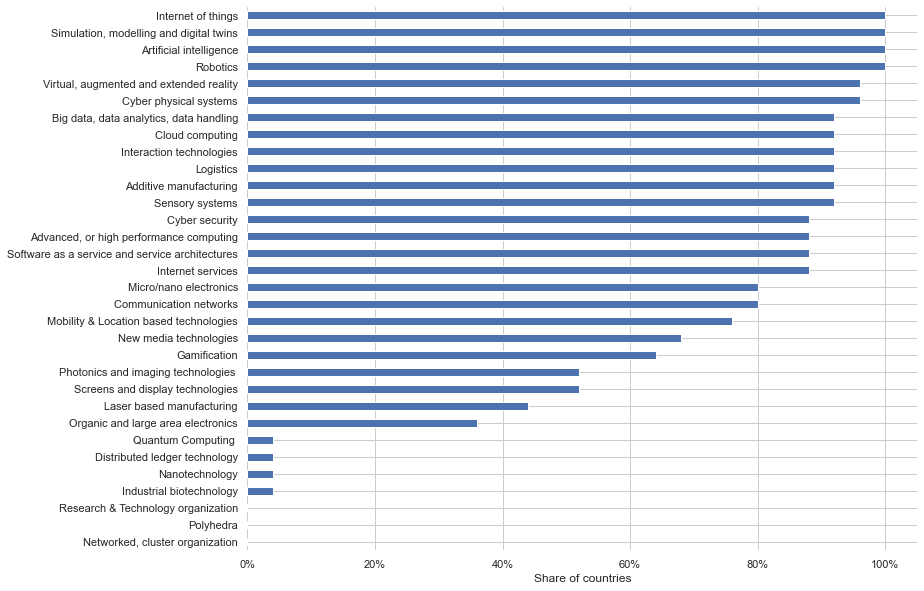

In [265]:
fig, ax = plt.subplots(figsize=(12,10))
ax = technologies_country_share.plot.barh()
ax.grid(True)
ax.set_xlabel('Share of countries')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_frame_on(False)
fig.savefig(os.path.join(PATH,'technologies_country_share.jpg'), bbox_inches='tight')

<ipython-input-293-e9ba5682c647>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  services_country_share = pd.Series(index=services_clear)


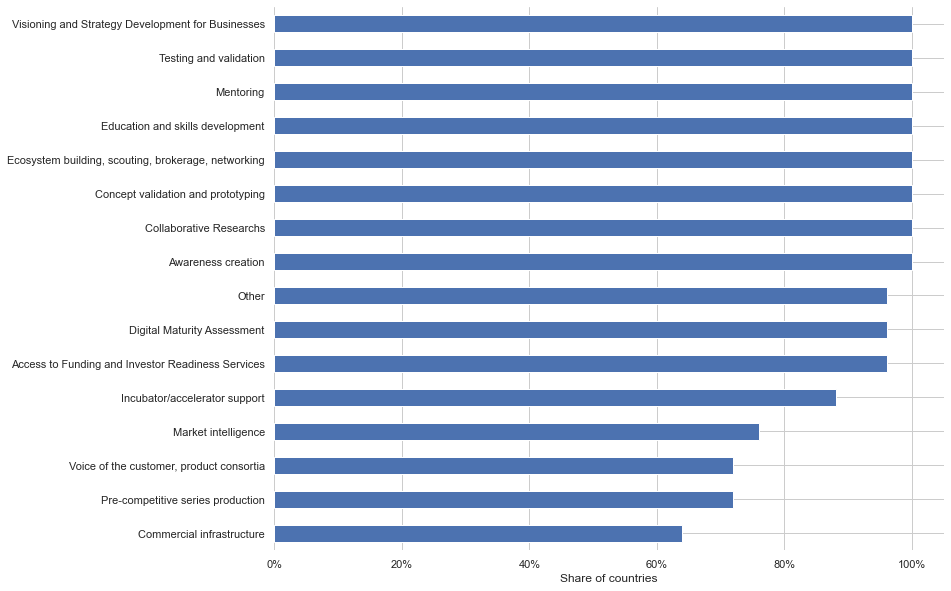

In [293]:
services_country = pd.DataFrame(index=countries)
for tech in services_clear:
    a = df.groupby('Country')[tech].sum()
    services_country = pd.concat([services_country, a], axis=1)

services_country_share = pd.Series(index=services_clear)
services_country_share
for tech in services_clear:
    services_country_share[tech] = (services_country[tech] > 0).sum()/no_countries
services_country_share = services_country_share.sort_values()*100

fig, ax = plt.subplots(figsize=(12,10))
ax = services_country_share.plot.barh()
ax.grid(True)
ax.set_xlabel('Share of countries')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_frame_on(False)
fig.savefig(os.path.join(PATH,'services_country_share.jpg'), bbox_inches='tight')

<ipython-input-294-c5cfd43769a3>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  markets_country_share = pd.Series(index=markets_clear)


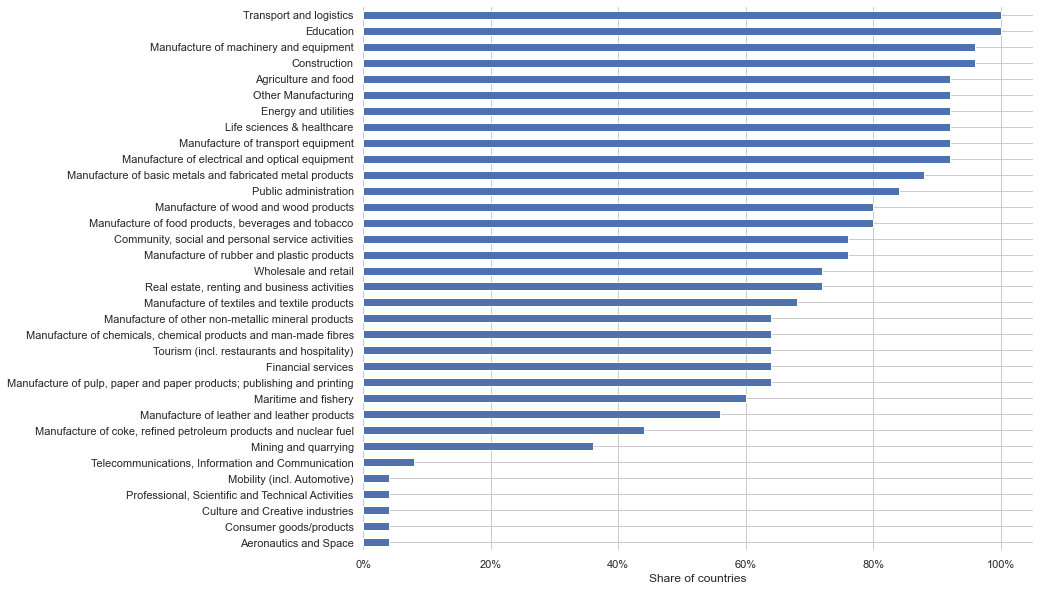

In [294]:
markets_country = pd.DataFrame(index=countries)
for tech in markets_clear:
    a = df.groupby('Country')[tech].sum()
    markets_country = pd.concat([markets_country, a], axis=1)

markets_country_share = pd.Series(index=markets_clear)
markets_country_share
for tech in markets_clear:
    markets_country_share[tech] = (markets_country[tech] > 0).sum()/no_countries
markets_country_share = markets_country_share.sort_values()*100

fig, ax = plt.subplots(figsize=(12,10))
ax = markets_country_share.plot.barh()
ax.grid(True)
ax.set_xlabel('Share of countries')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_frame_on(False)
fig.savefig(os.path.join(PATH,'markets_country_share.jpg'), bbox_inches='tight')

<ipython-input-295-db9340cee357>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  trls_country_share = pd.Series(index=trls_clear)


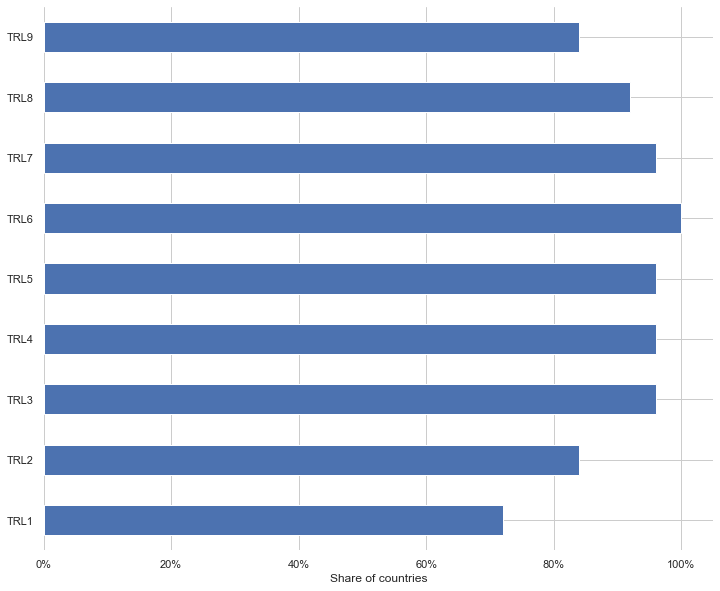

In [295]:
trls_country = pd.DataFrame(index=countries)
for tech in trls_clear:
    a = df.groupby('Country')[tech].sum()
    trls_country = pd.concat([trls_country, a], axis=1)

trls_country_share = pd.Series(index=trls_clear)
trls_country_share
for tech in trls_clear:
    trls_country_share[tech] = (trls_country[tech] > 0).sum()/no_countries
trls_country_share = trls_country_share*100

fig, ax = plt.subplots(figsize=(12,10))
ax = trls_country_share.plot.barh()
ax.grid(True)
ax.set_xlabel('Share of countries')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_frame_on(False)
fig.savefig(os.path.join(PATH,'trls_country_share.jpg'), bbox_inches='tight')

## 4. DIH coverage

In [332]:
bins = np.linspace(0,100, num=11)

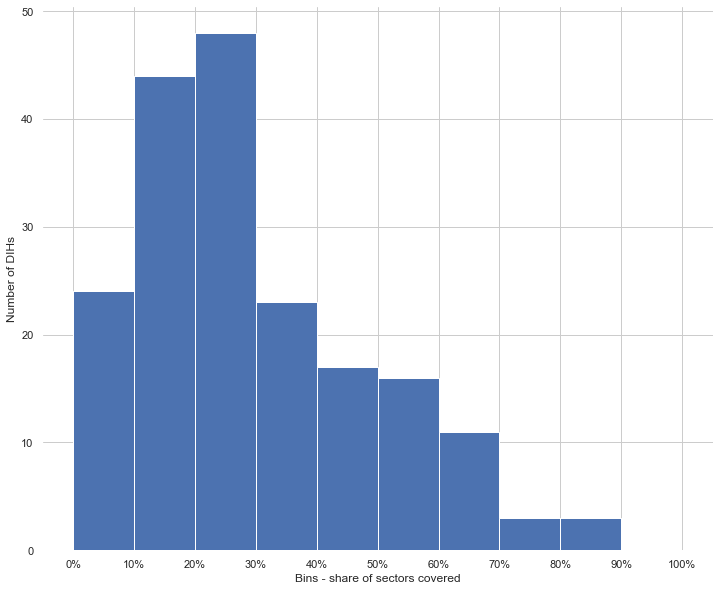

In [331]:
# Percentage histogram
fig, ax = plt.subplots(figsize=(12,10))
ax = df['Share Sectors'].hist(bins=bins)
ax.grid(True)
ax.set_xlabel('Bins - share of sectors covered')
ax.set_ylabel('Number of DIHs')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_frame_on(False)
tick_spacing = 10
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
fig.savefig(os.path.join(PATH,'markets_histogram.jpg'), bbox_inches='tight')

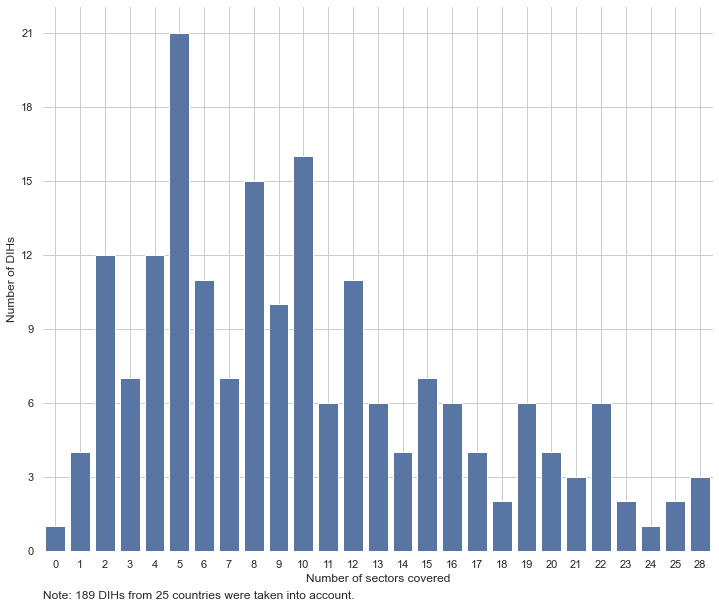

In [371]:
# Number histogram
fig, ax = plt.subplots(figsize=(12,10))
ax = sns.countplot(x='Number Sectors', data=df, color='#4C72B0')
ax.grid(True)
ax.set_xlabel('Number of sectors covered')
ax.set_ylabel('Number of DIHs')
tick_spacing = 3
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_frame_on(False)
ax.annotate(f'Note: {len(df)} DIHs from {no_countries} countries were taken into account.', (0,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top')
fig.savefig(os.path.join(PATH,'markets_number_histogram.jpg'), bbox_inches='tight')

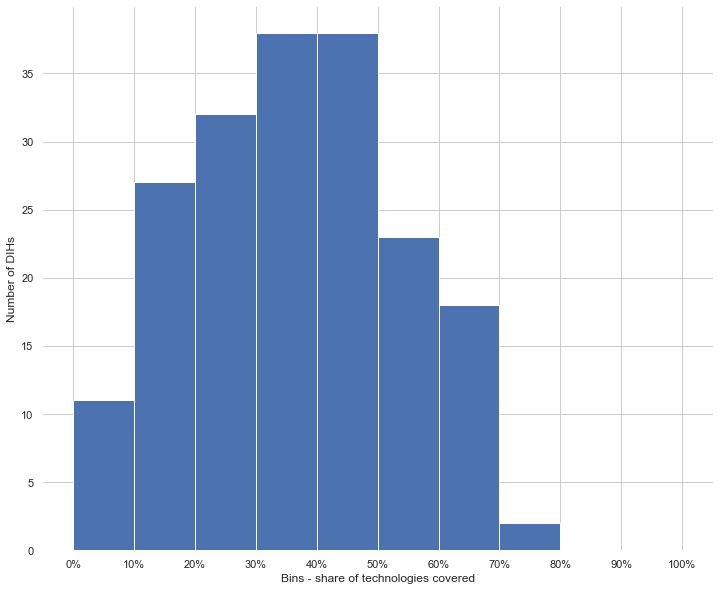

In [334]:
fig, ax = plt.subplots(figsize=(12,10))
ax = df['Share Technologies'].hist(bins=bins)
ax.grid(True)
ax.set_xlabel('Bins - share of technologies covered')
ax.set_ylabel('Number of DIHs')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_frame_on(False)
tick_spacing = 10
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
fig.savefig(os.path.join(PATH,'technologies_histogram.jpg'), bbox_inches='tight')

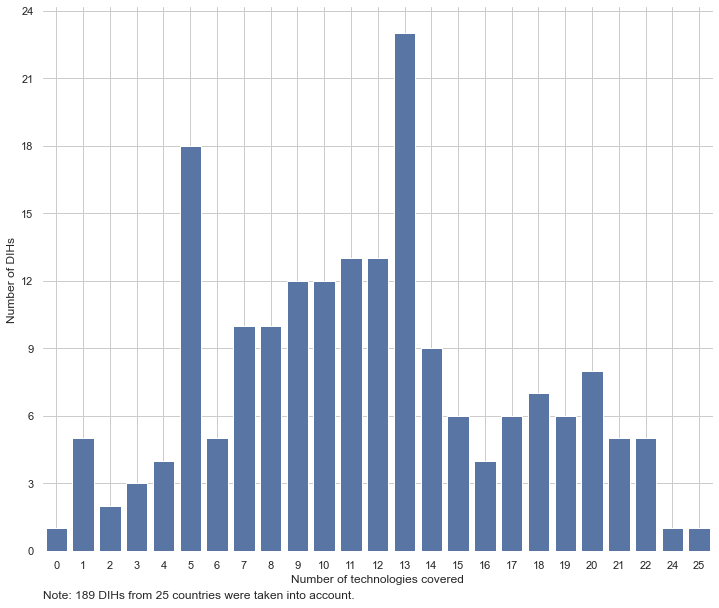

In [372]:
# Number histogram
fig, ax = plt.subplots(figsize=(12,10))
ax = sns.countplot(x='Number Technologies', data=df, color='#4C72B0')
ax.grid(True)
ax.set_xlabel('Number of technologies covered')
ax.set_ylabel('Number of DIHs')
tick_spacing = 3
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_frame_on(False)
ax.annotate(f'Note: {len(df)} DIHs from {no_countries} countries were taken into account.', (0,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top')
fig.savefig(os.path.join(PATH,'technologies_number_histogram.jpg'), bbox_inches='tight')

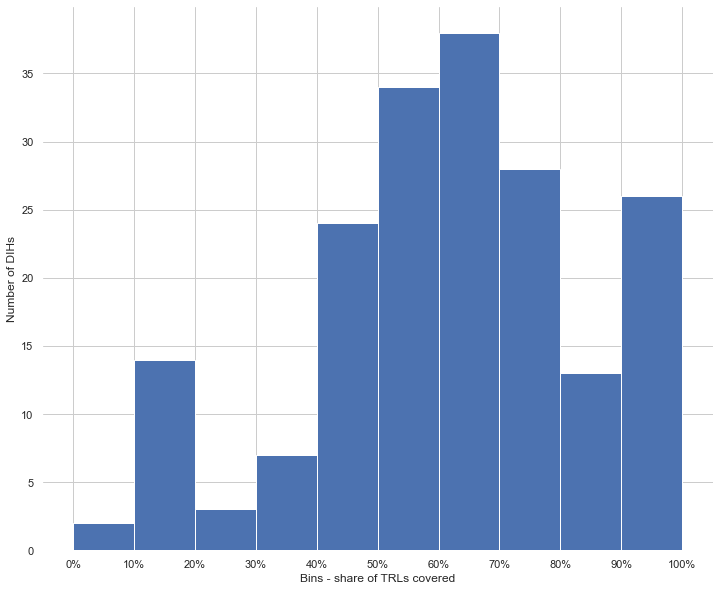

In [338]:
fig, ax = plt.subplots(figsize=(12,10))
ax = df['Share TRLs'].hist(bins=bins)
ax.grid(True)
ax.set_xlabel('Bins - share of TRLs covered')
ax.set_ylabel('Number of DIHs')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_frame_on(False)
tick_spacing = 10
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
fig.savefig(os.path.join(PATH,'trls_histogram.jpg'), bbox_inches='tight')

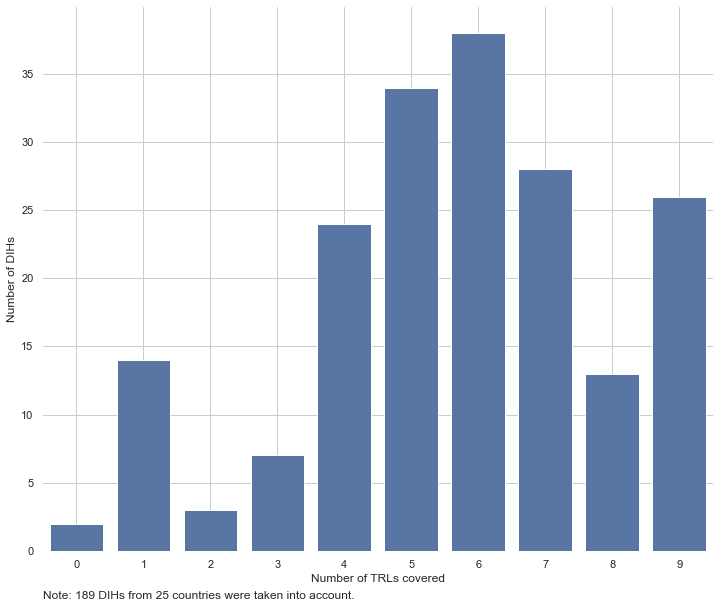

In [374]:
# Number histogram
fig, ax = plt.subplots(figsize=(12,10))
ax = sns.countplot(x='Number TRLs', data=df, color='#4C72B0')
ax.grid(True)
ax.set_xlabel('Number of TRLs covered')
ax.set_ylabel('Number of DIHs')
tick_spacing = 5
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_frame_on(False)
ax.annotate(f'Note: {len(df)} DIHs from {no_countries} countries were taken into account.', (0,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top')
fig.savefig(os.path.join(PATH,'trls_number_histogram.jpg'), bbox_inches='tight')

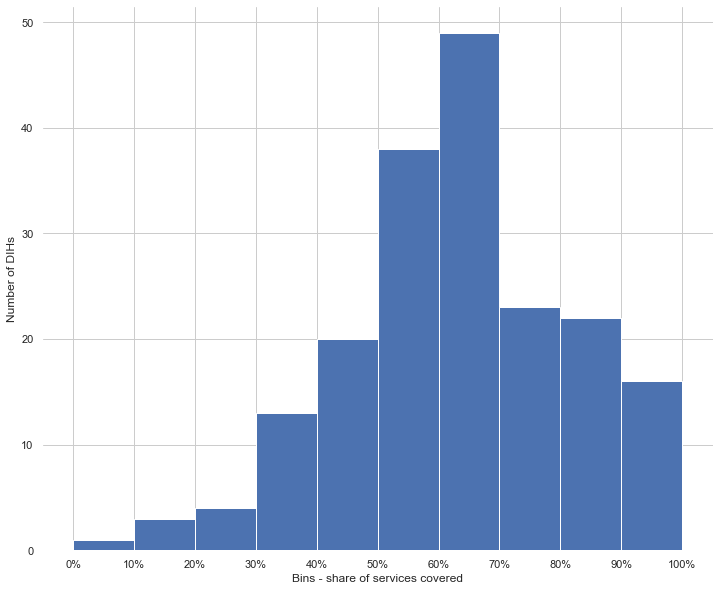

In [339]:
fig, ax = plt.subplots(figsize=(12,10))
ax = df['Share Services'].hist(bins=bins)
ax.grid(True)
ax.set_xlabel('Bins - share of services covered')
ax.set_ylabel('Number of DIHs')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_frame_on(False)
tick_spacing = 10
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
fig.savefig(os.path.join(PATH,'services_histogram.jpg'), bbox_inches='tight')

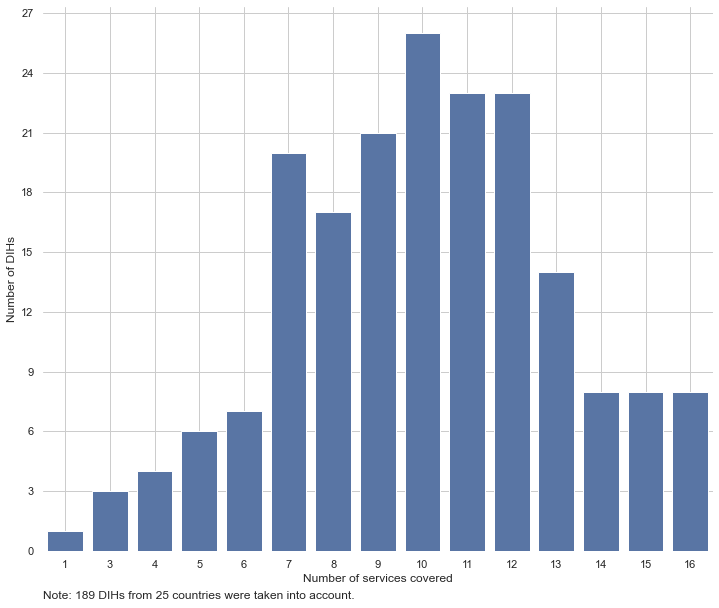

In [373]:
# Number histogram
fig, ax = plt.subplots(figsize=(12,10))
ax = sns.countplot(x='Number Services', data=df, color='#4C72B0')
ax.grid(True)
ax.set_xlabel('Number of services covered')
ax.set_ylabel('Number of DIHs')
tick_spacing = 3
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_frame_on(False)
ax.annotate(f'Note: {len(df)} DIHs from {no_countries} countries were taken into account.', (0,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top')
fig.savefig(os.path.join(PATH,'services_number_histogram.jpg'), bbox_inches='tight')

### Correlations

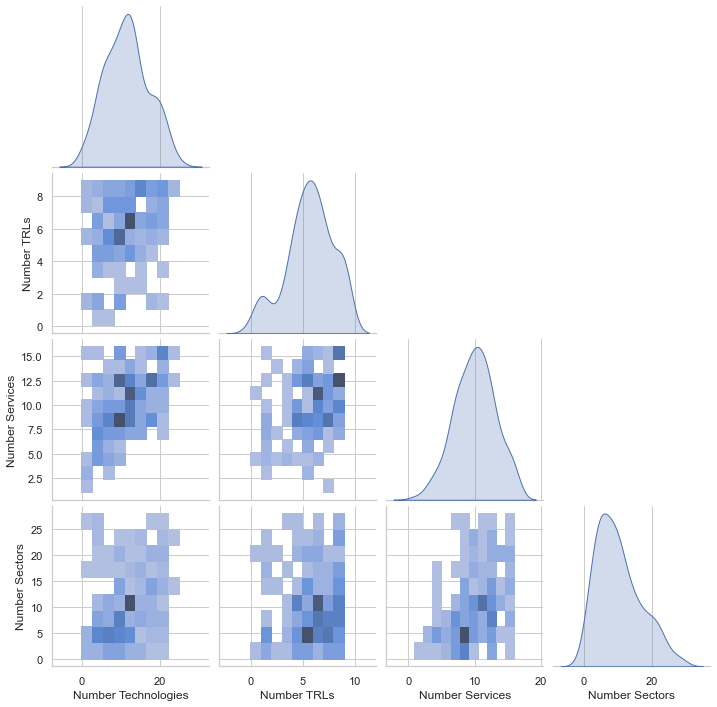

In [402]:
sns_plot = sns.pairplot(df[['Number Technologies', 'Number TRLs', 'Number Services', 'Number Sectors']], kind="hist", corner=True, diag_kind="kde")
#sns_plot.savefig("output.png")
sns_plot.savefig(os.path.join(PATH,'correlations_1.jpg'), bbox_inches='tight')

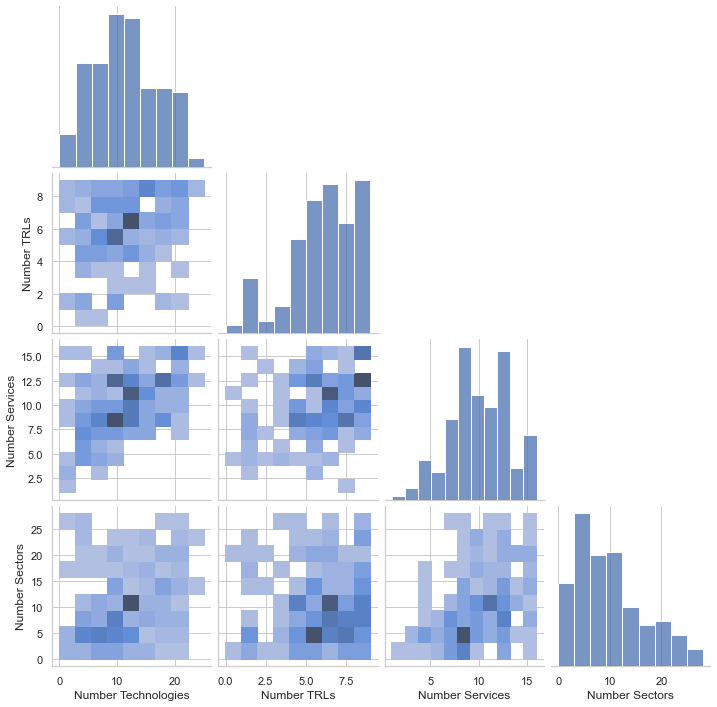

In [403]:
sns_plot = sns.pairplot(df[['Number Technologies', 'Number TRLs', 'Number Services', 'Number Sectors']], kind="hist", corner=True)
sns_plot.savefig(os.path.join(PATH,'correlations_2.jpg'), bbox_inches='tight')

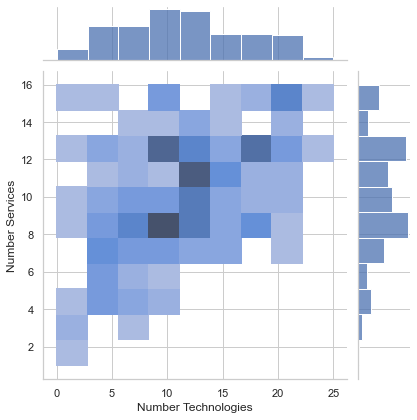

In [394]:
sns.jointplot(data=df, x='Number Technologies', y='Number Services', kind='hist')

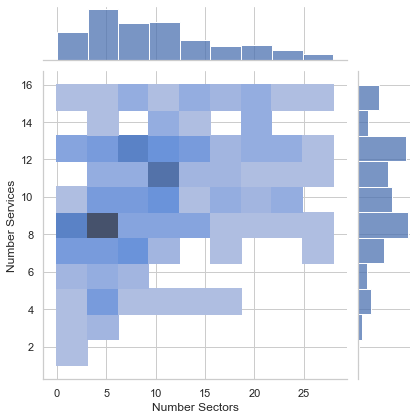

In [382]:
sns.jointplot(data=df, x='Number Sectors', y='Number Services', kind='hist')

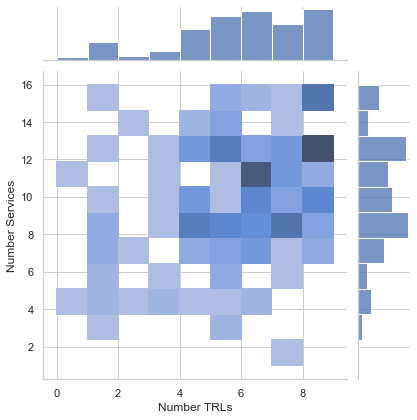

In [383]:
sns.jointplot(data=df, x='Number TRLs', y='Number Services', kind='hist')

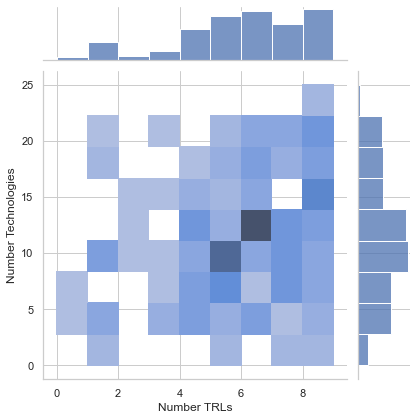

In [384]:
sns.jointplot(data=df, x='Number TRLs', y='Number Technologies', kind='hist')

### Export

In [412]:
df.to_excel('DIH Mapping Raw Data v2.xlsx', sheet_name='raw data', index_label=False)